# Data Science Project

## Part 1 - Data Analysis

In Project part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached 
     



**1.**  
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  
* B) Compute descriptive statistics of the data. Comment on the results.  
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.

**2.**
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? 


**3.**  
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. Comment on the results 
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  

**4.**  
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers. 

**5.** 
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments.

**6.** 
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it.


**7.**  
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. 

**8.**
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, 
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  

## Q1:

Solution:



In [2]:
import pandas as pd
df = pd.read_csv('Breast_Cancer-Winter2024.csv') # Load the data into a DataFrame object called 'df'
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,NaN,Alive
4,47,White,Married,T2,N1,IIB,NaN,3,Regional,41.0,Positive,Positive,3,1,NaN,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9.0,Positive,Positive,1,1,49.0,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46.0,Positive,Positive,14,8,69.0,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22.0,Positive,Negative,11,3,69.0,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44.0,Positive,Positive,11,1,72.0,Alive


In [3]:
# Count death events by race
death_counts = df[df['Status'] == 'Dead']['Race'].value_counts()  # Creating a series with counts of deaths per race
total_deaths = death_counts.sum() # Summing up the number of death events

# Calculate percentages
death_percentages = (death_counts / total_deaths) * 100 # Calculating the percentage of total deaths for each race

# Print out the death counts and percentages
print(death_counts)
print(death_percentages)

Race
White    510
Black     73
Other     33
Name: count, dtype: int64
Race
White    82.792208
Black    11.850649
Other     5.357143
Name: count, dtype: float64


In [4]:
df.describe()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4018.000000,4024.000000,4024.000000,4017.000000
mean,53.972167,30.422101,14.357107,4.158052,71.173762
std,8.963134,21.154352,8.099675,5.109331,23.089655
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
# Age: The average age of individuals in the dataset is approximately 53.97 years, with a standard deviation of about 8.96 years,
# which indicates a moderate spread of age data around the mean. The age ranges from a minimum of 30 to a maximum of 69 years, 
# showing that the dataset may be focusing on a middle-aged to older adult population.

# Tumor Size: The mean tumor size is roughly 30.42 mm, with a substantial standard deviation of 21.15 mm, suggesting a wide 
# variety of tumor sizes. The size ranges from 0 mm to a notably large tumor size of 140 mm. The presence of tumors with 0 mm 
# size could possibly indicate missing or erroneous data, or it could represent a very early stage of tumor development.

# Regional Node Examined: On average, about 14.36 lymph nodes were examined, with a standard deviation of 8.10, which implies 
# variability in the number of nodes examined across cases. This number ranges from 1 to a high of 61 nodes examined, which 
# could reflect the extent of cancer investigation done.

# Reginol [Regional] Node Positive: The average number of positive regional nodes detected is around 4.16, with a standard 
# deviation of 5.11, pointing to a significant variability in the spread of cancer to lymph nodes. This number varies from 1 to 
# 46, where a higher number of positive nodes typically suggests a more advanced stage of cancer.

# Survival Months: The average survival time after diagnosis is about 71.17 months, which is nearly 6 years, with a standard 
# deviation of 23.09 months. The range of survival times is from 0 to 107 months. A minimum value of 0 might indicate that some 
# patients passed away very shortly after diagnosis, whereas the maximum of 107 months suggests that some patients survived 
# beyond 9 years post-diagnosis.

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Breast_Cancer-Winter2024.csv')

# Select the medical numerical columns for skewness and kurtosis analysis
medical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to store the skewness and kurtosis
skewness_kurtosis_results = {}

# Calculate and print skewness and kurtosis for each medical variable
for variable in medical_variables:
    skew = df[variable].skew()  # Skewness of the variable
    kurt = df[variable].kurtosis()  # Kurtosis of the variable
    skewness_kurtosis_results[variable] = {'Skewness': skew, 'Kurtosis': kurt}

# Output the results
for variable, values in skewness_kurtosis_results.items():  # .item return each item in a dictionary as tuples in a list
    print(f"{variable} - Skewness: {values['Skewness']}, Kurtosis: {values['Kurtosis']}")


Age - Skewness: -0.2203727859678868, Kurtosis: -0.7550875306304676
Tumor Size - Skewness: 1.7360650155740946, Kurtosis: 3.6228951934582416
Regional Node Examined - Skewness: 0.8292737694534275, Kurtosis: 1.6493224651730367
Reginol Node Positive - Skewness: 2.702535859800024, Kurtosis: 8.981265882027166
Survival Months - Skewness: -0.6110980670933592, Kurtosis: 0.07057080755735923


In [ ]:
# Age:

# Skewness: -0.220 indicates a slight negative skew, meaning there is a subtle tail to the left. This suggests a slight 
# concentration of older individuals in the dataset.
# Kurtosis: -0.755 suggests a distribution that is relatively flat compared to the normal distribution (platykurtic), 
# indicating fewer outliers than expected in a normal distribution.

# Tumor Size:

# Skewness: 1.736 indicates a moderate positive skew, meaning there is a longer tail to the right. This shows that there are a 
# number of individuals with larger than average tumor sizes.
# Kurtosis: 3.623 indicates a leptokurtic distribution, which has heavier tails than a normal distribution, suggesting a 
# presence of outliers with very large tumor sizes.

# Regional Node Examined:

# Skewness: 0.829 indicates a moderate positive skew, meaning there is a longer tail to the right. This suggests that more 
# individuals had a higher than average number of nodes examined.
# Kurtosis: 1.649 also indicates a leptokurtic distribution, suggesting that there are outliers in the data, with some 
# individuals having a very high number of nodes examined.

# Reginol Node Positive:

# Skewness: 2.703 indicates a high positive skew, meaning there is a significant tail to the right. This indicates a high 
# concentration of patients with fewer positive nodes, but with some patients having a very high number of positive nodes.
# Kurtosis: 8.981 indicates a highly leptokurtic distribution, suggesting a significant number of outliers, specifically some 
# cases with a very high count of positive nodes.

# Survival Months:

# Skewness: -0.611 indicates a moderate negative skew, with a longer tail to the left. This implies that a number of 
# individuals had shorter survival times than the average.
# Kurtosis: 0.071 suggests a distribution that is very close to normal distribution (mesokurtic) in terms of its tailedness, 
# indicating an expected number of outliers similar to what would be expected in a normal distribution.

###  Q2:
Solution:

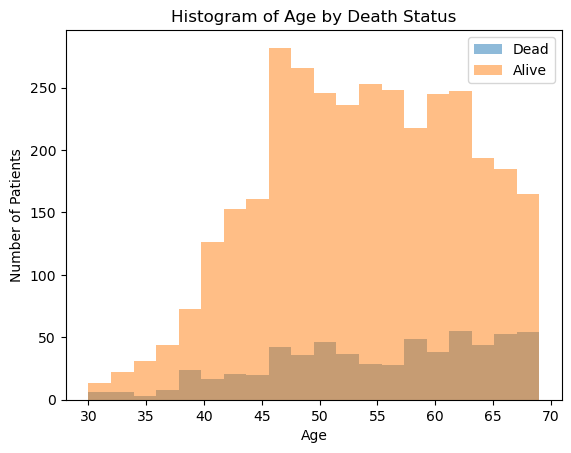

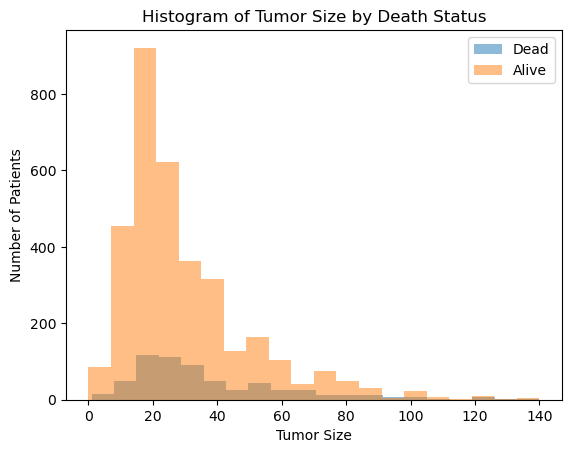

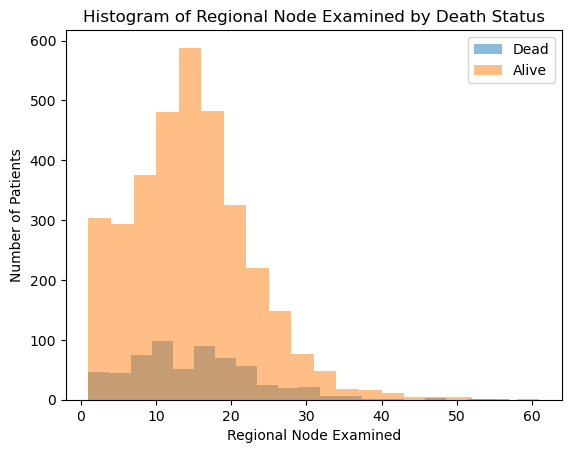

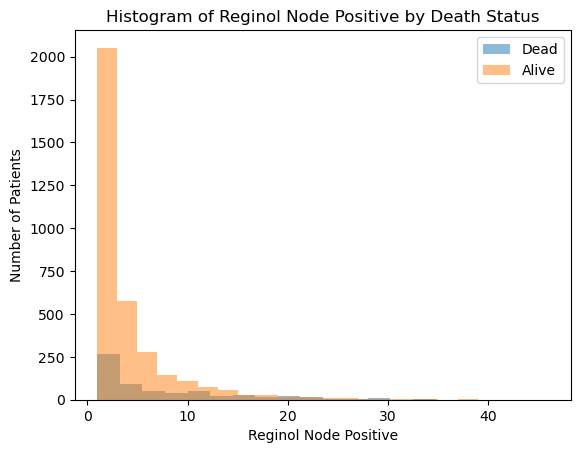

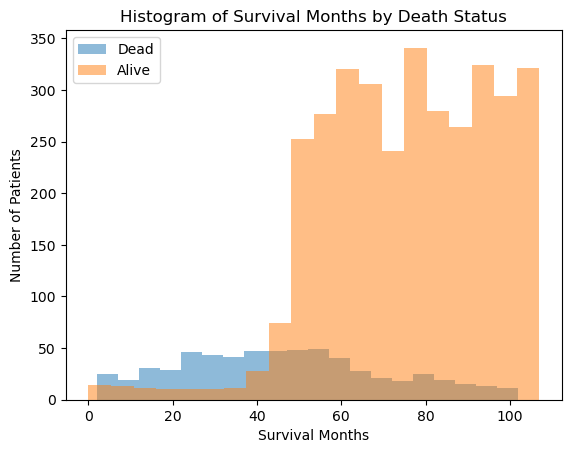

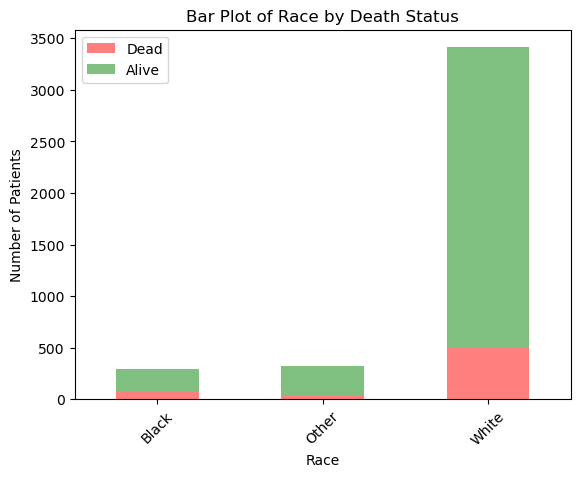

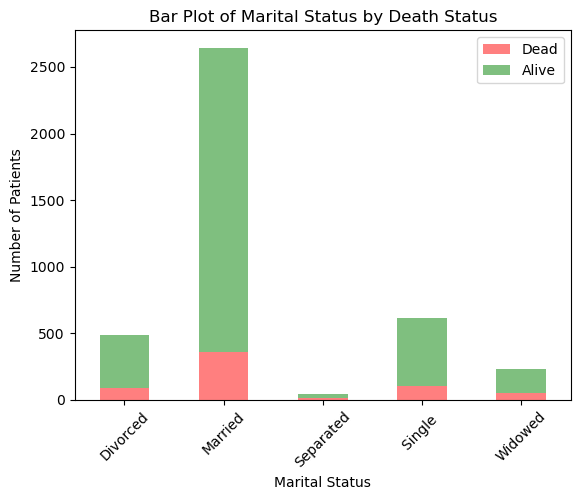

In [13]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting.

# Filter the DataFrame for patients by death status.
dead_patients = df[df['Status'] == 'Dead']
alive_patients = df[df['Status'] == 'Alive']

# List of medical variables to plot.
medical_variables = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Plotting the histogram for each medical variable with respect to death status.
for variable in medical_variables:
    plt.figure()  # Creates a new figure for each variable.
    plt.hist(dead_patients[variable].dropna(), bins=20, alpha=0.5, label='Dead')
    plt.hist(alive_patients[variable].dropna(), bins=20, alpha=0.5, label='Alive')
    plt.xlabel(variable)  # Label for the x-axis.
    plt.ylabel('Number of Patients')  # Label for the y-axis.
    plt.legend()  # Adds a legend to distinguish between the histograms.
    plt.title(f'Histogram of {variable} by Death Status')  # Title of the histogram.
    plt.show()  # Displays the plot.

# Analyzing race and marital status with respect to death status.
categories = ['Race', 'Marital Status']
for category in categories:
    plt.figure()  # Creates a new figure for each category.
    # Counts of each category within dead patients.
    dead_counts = dead_patients[category].value_counts().sort_index() # .sort_index: Sort object by labels (along an axis).
    # Counts of each category within alive patients.
    alive_counts = alive_patients[category].value_counts().sort_index() # value_counts() counts the number of occurrences of each value that this column takes
    
    # Creating bar plots.
    #alpha=0.5: This sets the opacity of the bars for the 'Alive' counts to 50%, making them semi-transparent. 
    #This can help in visualizing overlapping parts of the chart or in distinguishing stacked bars
    
    dead_counts.plot(kind='bar', alpha=0.5, color='red', label='Dead')
    alive_counts.plot(kind='bar', alpha=0.5, color='green', label='Alive', bottom=dead_counts)
    
#     bottom=dead_counts : It specifies that the bottom of each 'Alive' bar should not start at the x-axis 
#     (which would be the default) but should instead start at the top of the corresponding 'Dead' bar as defined by the values 
#     in dead_counts. This effectively stacks the 'Alive' bars on top of the 'Dead' bars for each category/x-axis label.
#     The result is a stacked bar chart where each category on the x-axis has two bars: one for 'Dead' counts starting from 
#     the x-axis upwards, and one for 'Alive' counts starting from the top of the 'Dead' bar upwards. This type of visualization 
#     is useful for comparing parts of a whole across categories, 
    
    
    plt.xlabel(category)  # Label for the x-axis.
    plt.ylabel('Number of Patients')  # Label for the y-axis.
    plt.legend()  # Adds a legend to distinguish between the bar plots.
    plt.title(f'Bar Plot of {category} by Death Status')  # Title of the bar plot.
    plt.xticks(rotation=45)  # Rotates x-axis labels for better visibility.
    plt.show()  # Displays the plot.


###  Q3:

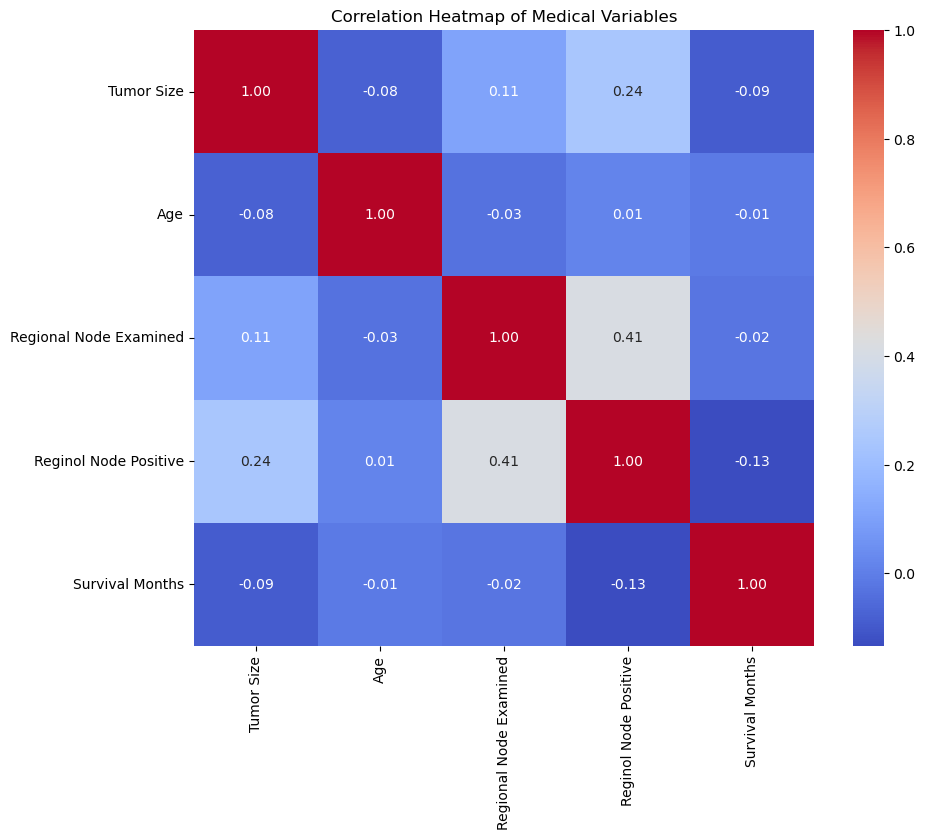

In [14]:
import seaborn as sns  # Import seaborn library for plotting.
import matplotlib.pyplot as plt  # Import matplotlib library for plotting.

# These are the medical variables of interest
medical_variables = ['Tumor Size', 'Age', 'Regional Node Examined','Reginol Node Positive','Survival Months']  

# Calculate the correlation matrix for the selected medical variables.
corr_matrix = df[medical_variables].corr()

# Generate a heatmap from the correlation matrix.
plt.figure(figsize=(10, 8))  # Set the size of the heatmap.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # 'annot' shows the correlation values, 'cmap' defines the color scheme.
plt.title('Correlation Heatmap of Medical Variables')  # Set the title of the heatmap.
plt.show()  # Display the heatmap.

#1 indicates a perfect positive linear relationship,
#0 indicates no linear relationship,
#-1 indicates a perfect negative linear relationship.

#The cells along the diagonal of the heatmap, where the variables intersect with themselves, 
#always show a correlation coefficient of 1 because a variable is always perfectly correlated with itself.

In [47]:
#The heatmap shows the correlation coefficients between several medical variables. Notably, 'Tumor Size' 
#has a modest positive correlation with 'Regional Node Positive' (0.24), which could suggest that as tumors increase in size, 
#they are more likely to be associated with a higher number of cancer-involved nodes. This relationship is clinically plausible 
#as larger tumors can have greater potential to spread. However, all other variables show weak correlations with each other, 
#especially 'Age' which has negligible correlation with 'Tumor Size' and 'Regional Node Examined'. 'Survival Months' also shows 
#very weak correlations with all other variables, suggesting that the length of survival is not strongly linearly predicted by 
#these specific measurements.

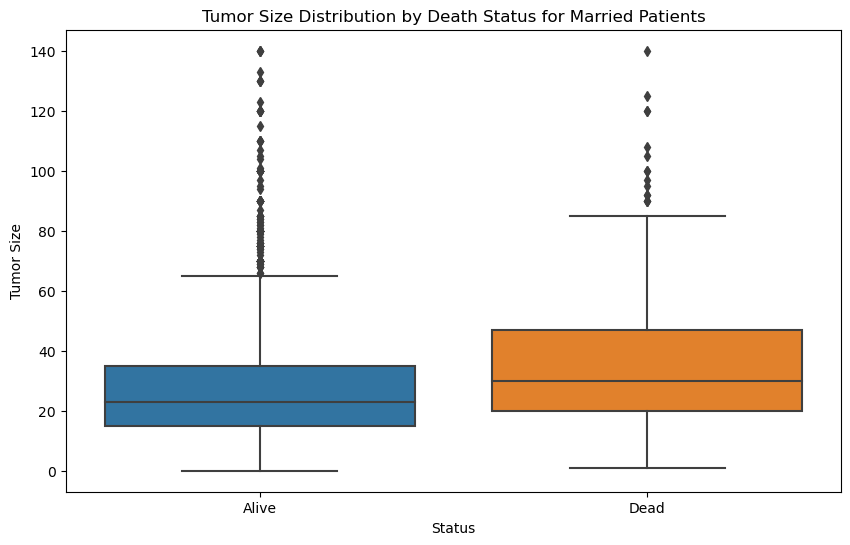

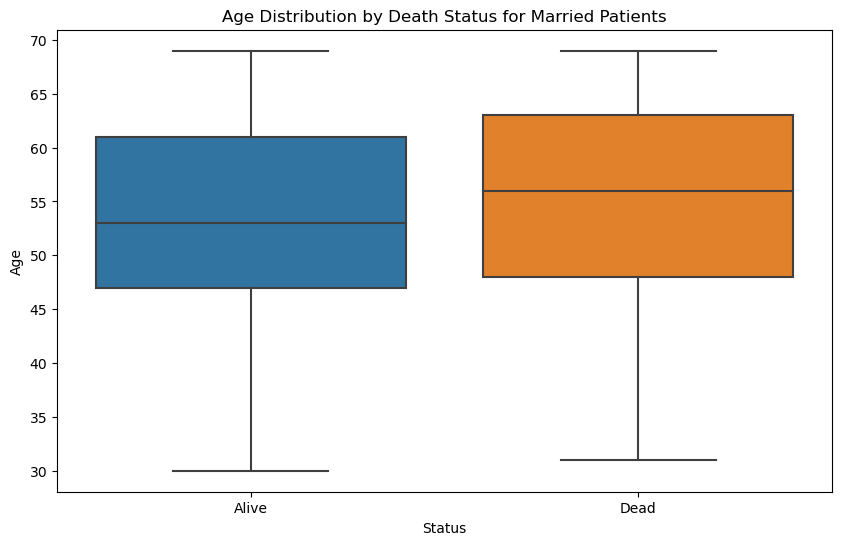

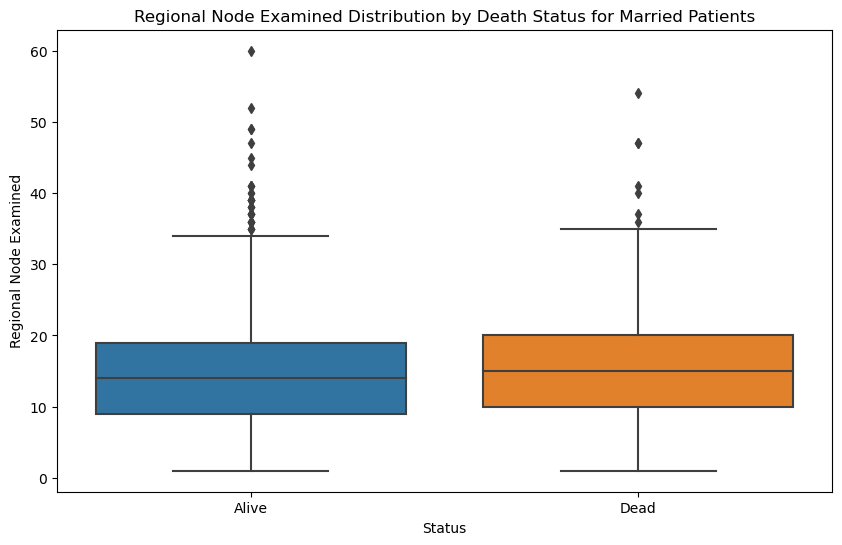

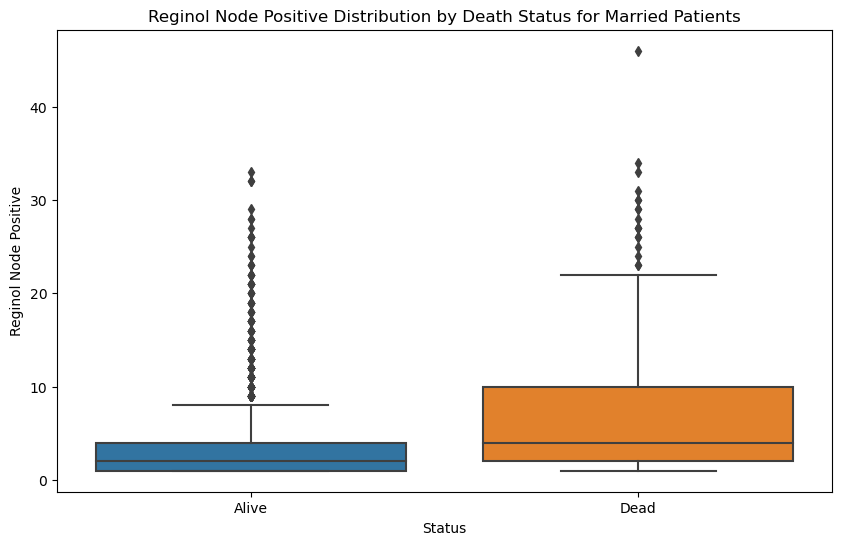

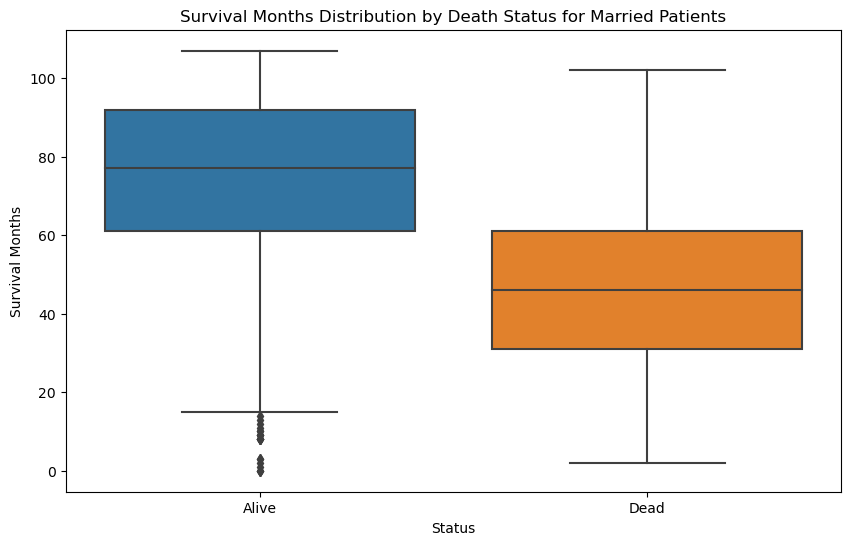

In [15]:
# Filter the DataFrame for married patients.
married_patients = df[df['Marital Status'] == 'Married']  # Select rows where 'Marital Status' is 'Married' and store in a new DataFrame.

# List of medical variables to check against the death event.
variables_to_check = ['Tumor Size', 'Age', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']  # These are the medical variables you are interested in analyzing.

# Plotting boxplots for each variable against the death status.
for variable in variables_to_check:
    plt.figure(figsize=(10, 6))  # Create a new figure for the plot with specified size (width, height) in inches.
    sns.boxplot(x='Status', y=variable, data=married_patients)  # Create a boxplot for the current variable, comparing the distribution for different 'Status' values.
    plt.title(f'{variable} Distribution by Death Status for Married Patients')  # Set the title of the boxplot, which includes the name of the current variable.
    plt.show()  # Display the boxplot.

In [49]:
#The boxplot comparing 'Tumor Size' by death status for married patients indicates that those who have died had a higher median 
#tumor size than those who are alive, as seen by the higher median in the 'Dead' category. This could imply that tumor size at 
#diagnosis is a factor associated with mortality. However, there is considerable overlap in the interquartile ranges, so while 
#tumor size may be a factor, it is not definitive on its own.

In [50]:
#The 'Age' distribution by death status for married patients shows a similar median age for both living and deceased patients. 
#The interquartile range is also similar across both categories. This similarity suggests that within this group of married 
#patients, age alone does not appear to be a significant discriminator of mortality.

In [51]:
#In the boxplot for 'Regional Node Examined', there is a similar distribution for both living and deceased patients, 
#but with the deceased patients showing a slightly higher median. This could indicate that a higher number of nodes examined 
#is associated with cases that have a worse prognosis. However, the large number of outliers, particularly in the 'Alive' group, 
#suggests that the relationship may not be straightforward and could be influenced by other factors.

In [52]:
#For 'Regional Node Positive', the deceased patients show a higher median compared to those who are alive, which is consistent 
#with clinical expectations that more positive nodes are an indication of more advanced disease and possibly worse outcomes. 
#However, there is significant overlap in the data, and numerous outliers indicate variability that might be affected by other 
#variables not included in this analysis.

In [53]:
#The boxplot for 'Survival Months' shows a lower median for deceased patients, which is expected since this group represents 
#individuals who have died. The living patients have a higher median, indicating they have survived for a longer period 
#post-diagnosis. This variable is directly related to the status of the patient (alive or dead) and as such, is not predictive 
#but rather descriptive of the outcome.

###  Q4:
Solution:



In [ ]:
#The rationale for identifying and removing outliers is to prevent these extreme values from skewing the results 
#of your analysis and potentially leading to incorrect conclusions.

In [11]:
import pandas as pd
df = pd.read_csv('Breast_Cancer-Winter2024.csv')

medical_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']  

# Define a function to calculate IQR and remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Calculate the first quartile
    Q3 = df[column].quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Define the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Define the upper bound for outliers
    
    # Remove outliers from the dataframe
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers for each variable
for variable in medical_variables:
    df = remove_outliers(df, variable)

# Now 'df' has had outliers removed from the specified medical variables

In [ ]:
#
#
#
#below is another code to spot the diffrence before and after removing otliers.
#
#
#

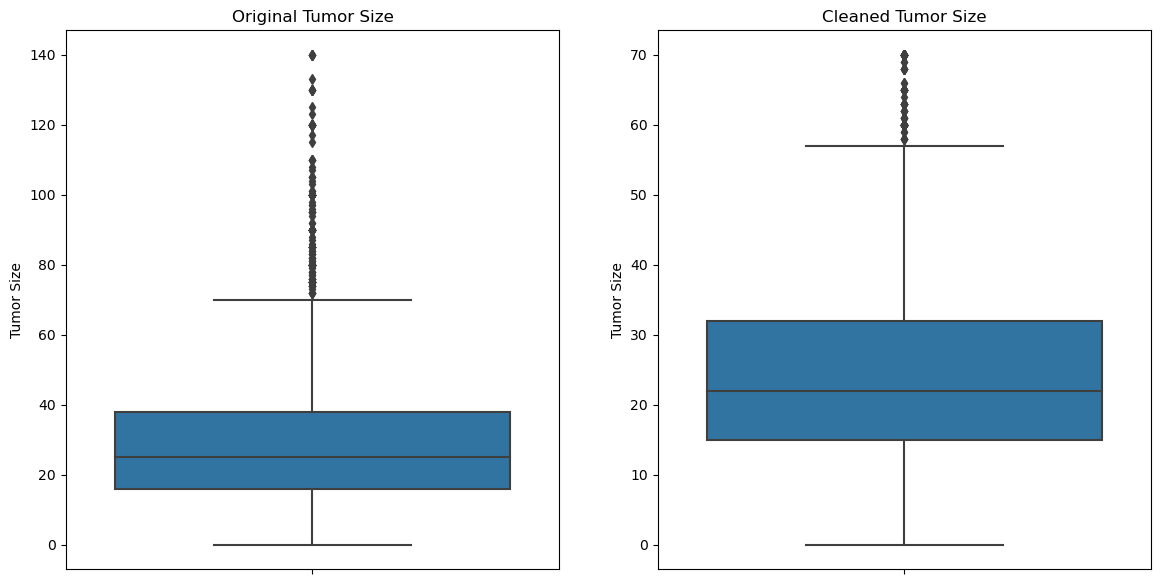

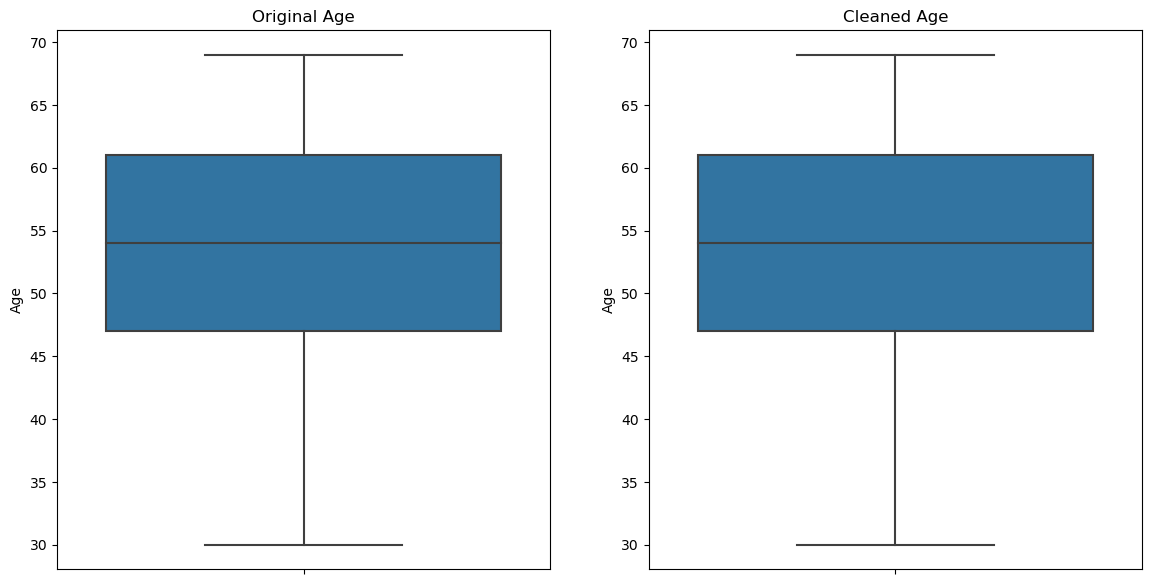

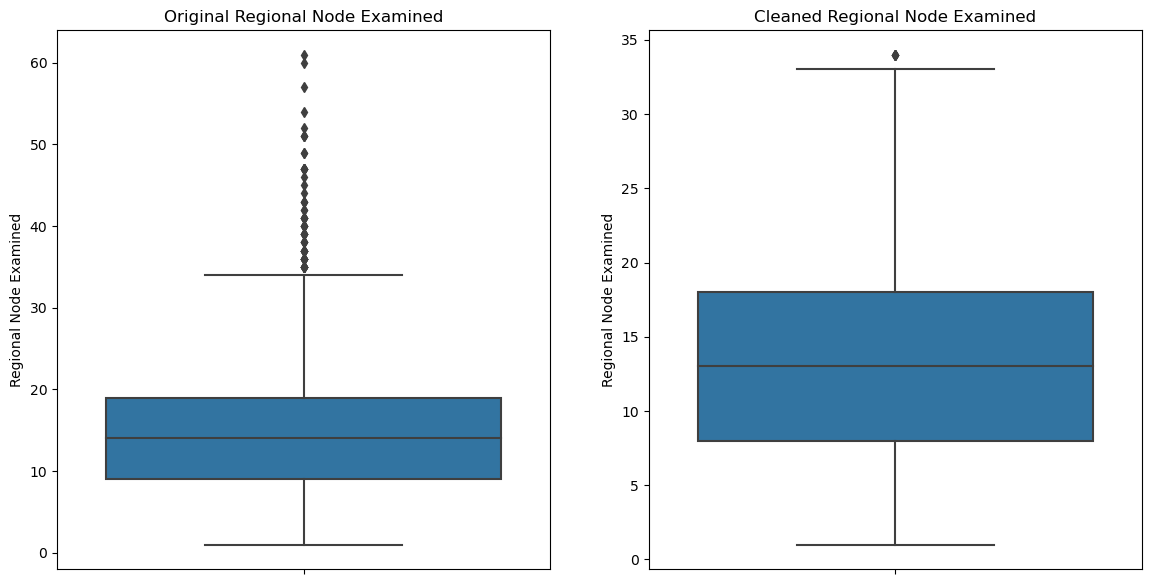

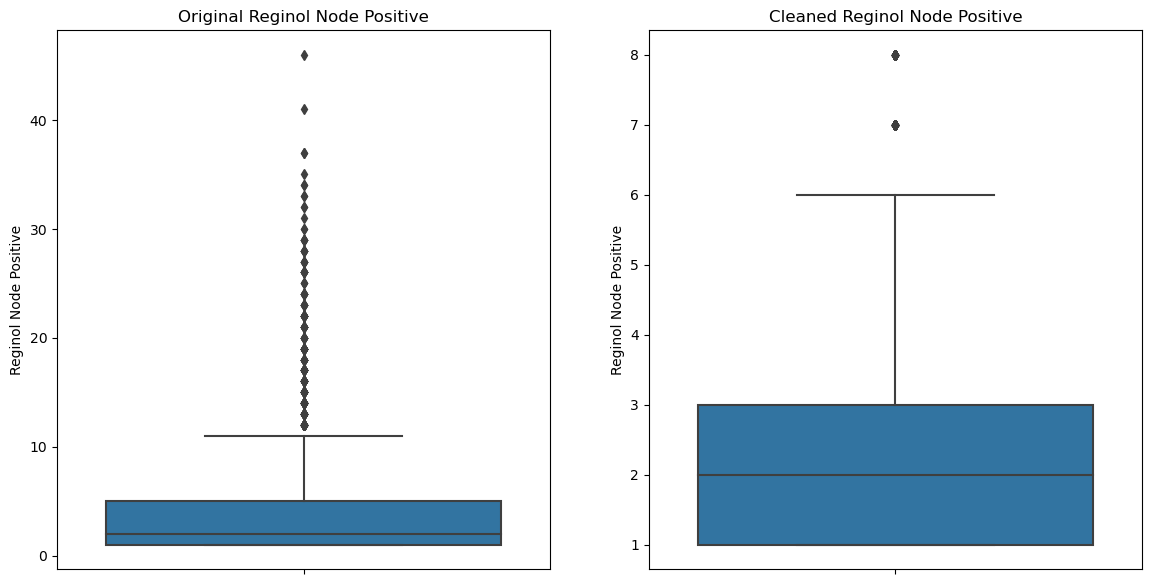

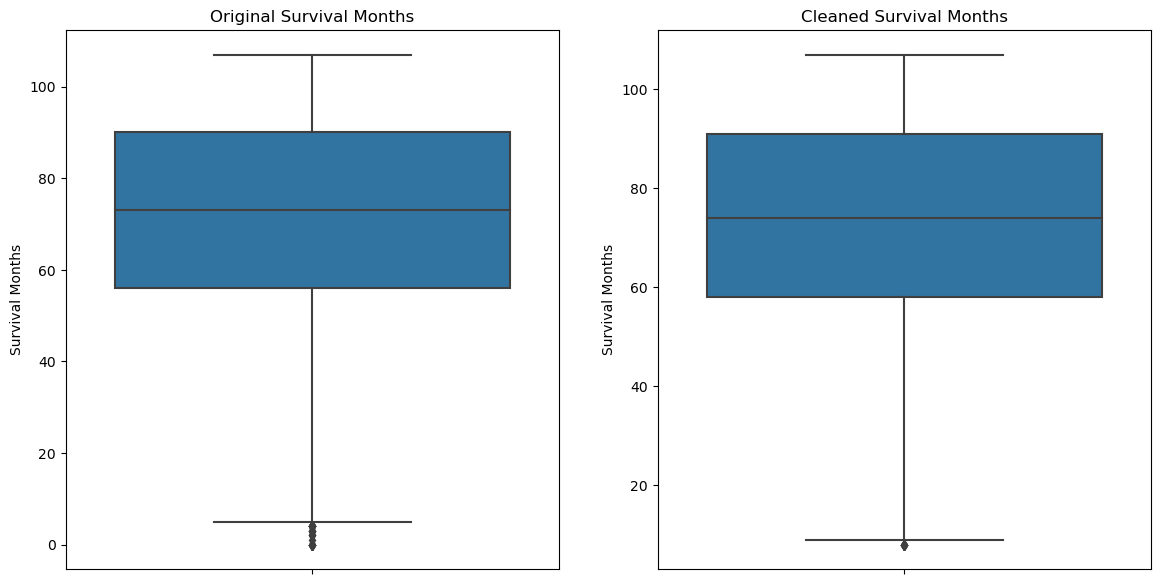

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Breast_Cancer-Winter2024.csv')

# Assuming 'medical_variables' includes the names of the medical variables you're interested in
medical_variables = ['Tumor Size', 'Age', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']  # Replace with your actual variables.

# Function to remove outliers for a specific column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the original DataFrame to compare before and after outlier removal
cleaned_df = df.copy()

# Remove outliers for each variable and update the cleaned DataFrame
for variable in medical_variables:
    cleaned_df = remove_outliers(cleaned_df, variable)

# Plotting the original and cleaned data side-by-side for comparison
for variable in medical_variables:
    plt.figure(figsize=(14, 7))
    
    # Original data plot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[variable])
    plt.title(f'Original {variable}')

    # Cleaned data plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=cleaned_df[variable])
    plt.title(f'Cleaned {variable}')

    plt.show()


###  Q5:

In [19]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the dataset from a CSV file into a DataFrame called 'df'
df = pd.read_csv('Breast_Cancer-Winter2024.csv')

# Trim leading and trailing whitespace from the column names of the DataFrame
df.columns = df.columns.str.strip()

# Define a function to impute missing values in a DataFrame column
def impute_missing_values(df, column):
    # Check if the column data type is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Attempt to coerce non-numeric values to NaN and convert column to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')
        # Calculate the mean of the column, ignoring NaN values
        mean_value = df[column].mean()
        # Replace NaN values in the column with the calculated mean
        df[column].fillna(mean_value, inplace=True)
        # Print a message indicating completion of numeric imputation
        print(f"Imputed missing values in numeric column '{column}' with mean value: {mean_value}")
    else:
        # For non-numeric columns, find the most common value (mode)
        most_common_value = df[column].mode().iloc[0]
        # Replace NaN values in the column with the most common value
        df[column].fillna(most_common_value, inplace=True)
        # Print a message indicating completion of non-numeric imputation
        print(f"Imputed missing values in non-numeric column '{column}' with mode value: '{most_common_value}'")
    # Return the DataFrame with imputed values
    return df

# Create a list of all column names in the DataFrame to check for missing values
columns_to_check = df.columns.tolist()

# Loop through each column in the DataFrame
for column in columns_to_check:
    # Calculate the number of missing (NaN) values in the column
    missing_before = df[column].isnull().sum()
    # If there are missing values, perform imputation
    if missing_before > 0:
        # Print the number of missing values before imputation
        print(f"Column '{column}' has {missing_before} missing values.")
        # Apply the imputation function to the column
        df = impute_missing_values(df, column)
        # Calculate and print the number of missing values after imputation to confirm changes
        missing_after = df[column].isnull().sum()
        print(f"Column '{column}' now has {missing_after} missing values.\n")

# Print a summary of the DataFrame to confirm that all missing values have been imputed
print("\nDataFrame info after imputation:")
df.info()


Column 'T Stage' has 5 missing values.
Imputed missing values in non-numeric column 'T Stage' with mode value: 'T2'
Column 'T Stage' now has 0 missing values.

Column 'differentiate' has 6 missing values.
Imputed missing values in non-numeric column 'differentiate' with mode value: 'Moderately differentiated'
Column 'differentiate' now has 0 missing values.

Column 'Tumor Size' has 6 missing values.
Imputed missing values in numeric column 'Tumor Size' with mean value: 30.422100547536086
Column 'Tumor Size' now has 0 missing values.

Column 'Survival Months' has 7 missing values.
Imputed missing values in numeric column 'Survival Months' with mean value: 71.17376151356734
Column 'Survival Months' now has 0 missing values.


DataFrame info after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age            

In [ ]:
#In analysis, i encountered missing values across various medical variables, which needed to be addressed to ensure the 
#integrity and accuracy of statistical models. After assessing the pattern of missingness and considering the nature of 
#dataset, i opted for mean imputation for continuous variables as it is a standard practice that minimizes the 
#introduction of bias when the data is missing at random. This method involves replacing missing values with the mean 
#value of each respective variable, maintaining the original distribution's central tendency. i limited this approach to 
#numeric columns where calculating a mean is meaningful and applicable, while non-numeric or categorical variables were 
#evaluated separately to determine if a different technique, such as mode imputation or categorical assignment, was more 
#appropriate. This strategy was chosen for its simplicity and effectiveness, and it allowed to retain all cases for a 
#comprehensive analysis.

###  Q6:

In [20]:
import pandas as pd
df = pd.read_csv('Breast_Cancer-Winter2024.csv')

# List of attributes that cannot be zero for medical reasons
non_zero_attributes = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']  

# Impute zero values with the median for each attribute
for attribute in non_zero_attributes:
    if 0 in df[attribute].unique():  # Check if there are zero values in the column
        median_value = df[df[attribute] != 0][attribute].median()  # Calculate the median of non-zero values
        df[attribute].replace(0, median_value, inplace=True)  # Replace zeros with the median value 
        #inplace=True modifies the original DataFrame directly, eliminating the need to assign the result to a new variable
        print(f"Imputed zero values in '{attribute}' with median value: {median_value}")
    else:
        print(f"No zero imputation needed for '{attribute}'.")

# The DataFrame 'df' now has zero values imputed with the median for the specified attributes

Imputed zero values in 'Tumor Size' with median value: 25.0
No zero imputation needed for 'Regional Node Examined'.
No zero imputation needed for 'Reginol Node Positive'.
Imputed zero values in 'Survival Months' with median value: 73.0


In [ ]:
#Tumor Size: A zero value for tumor size is not plausible because patients in a breast cancer dataset have been diagnosed 
#with the disease, which means there should be a measurable tumor. Therefore, a zero value here might indicate a missing or 
#unrecorded measurement rather than the actual absence of a tumor.

#Regional Node Examined: A zero value could suggest that no lymph nodes were examined, which is unlikely in standard cancer 
#diagnosis and treatment protocols where examining regional lymph nodes is common practice. A zero in this context may be due 
#to missing data or a data entry error.

#Reginol Node Positive: If this variable indicates the number of lymph nodes that tested positive for cancer, a zero could be 
#medically valid, representing cases where the cancer has not spread to the lymph nodes. However, if the dataset specifically 
#includes patients with node-positive cancer, zeros in this variable would be incorrect. The decision to impute these values 
#should be based on additional context from the dataset and domain expertise.

#Survival Months: A zero in this column could indicate that the patient passed away immediately after diagnosis, which is 
#possible but rare. More likely, it might represent cases where the survival time was not recorded or the patient was lost to 
#follow-up immediately after diagnosis. Imputing this value should be done with caution, as survival time is a critical outcome 
#measure in cancer studies.

###  Q7:

In [21]:
import pandas as pd

# Load the data
df = pd.read_csv('Breast_Cancer-Winter2024.csv')

# Print summary statistics of 'Tumor Size' and 'Survival Months' before rescaling
print("Before rescaling:")
print(df[['Tumor Size', 'Survival Months']].describe())

# Convert 'Tumor Size' to a numeric data type, replacing non-numeric values with NaN
df['Tumor Size'] = pd.to_numeric(df['Tumor Size'], errors='coerce') #errors='coerce':makes the whole column numeric.

# Convert 'Survival Months' to a numeric data type, replacing non-numeric values with NaN
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

# Remove rows where 'Tumor Size' or 'Survival Months' are NaN after coercion
df.dropna(subset=['Tumor Size', 'Survival Months'], inplace=True)

# Perform Min-Max normalization on 'Tumor Size', scaling it to a [0,1] range
df['Tumor Size'] = (df['Tumor Size'] - df['Tumor Size'].min()) / (df['Tumor Size'].max() - df['Tumor Size'].min())

# Perform Min-Max normalization on 'Survival Months', scaling it to a [0,1] range
df['Survival Months'] = (df['Survival Months'] - df['Survival Months'].min()) / (df['Survival Months'].max() - df['Survival Months'].min())

# Print summary statistics of 'Tumor Size' and 'Survival Months' after rescaling to confirm changes
print("\nAfter rescaling:")
print(df[['Tumor Size', 'Survival Months']].describe())


Before rescaling:
        Tumor Size  Survival Months
count  4018.000000      4017.000000
mean     30.422101        71.173762
std      21.154352        23.089655
min       0.000000         0.000000
25%      16.000000        56.000000
50%      25.000000        73.000000
75%      38.000000        90.000000
max     140.000000       107.000000

After rescaling:
        Tumor Size  Survival Months
count  4011.000000      4011.000000
mean      0.217231         0.666170
std       0.150976         0.214412
min       0.000000         0.000000
25%       0.114286         0.523364
50%       0.178571         0.682243
75%       0.271429         0.841121
max       1.000000         1.000000


In [ ]:
#In dataset, the rescaling of attributes like 'Tumor Size' and 'Survival Months' to a uniform [0,1] range was conducted to 
#normalize the data, ensuring that each feature contributes equally to analytical models without bias from varying scales. 
#The Min-Max scaling technique was selected due to its simplicity and effectiveness in maintaining the relationships within 
#the data while providing consistency across different attributes. This is particularly beneficial for algorithms sensitive 
#to the magnitude of variables, and it facilitates a more stable and faster convergence during model training. Prior to 
#rescaling, i converted the data to numeric types to handle any non-numeric entries and removed missing values to prevent them 
#from distorting the rescaling process. The transformation to a common scale allows to compare and interpret the variables on 
#the same basis, crucial for the accuracy of subsequent analyses and predictive modeling.

###  Q8 :
Solution


In [22]:
# Create a new attribute by dividing the number of positive regional nodes by the total number of nodes examined
df['Positive_Node_Ratio'] = df['Reginol Node Positive'] / df['Regional Node Examined']

# Check if 'differentiate' exists in the DataFrame and remove it
if 'differentiate' in df.columns:
    df.drop('differentiate', axis=1, inplace=True)  # Remove the 'differentiate' column

# Display the remaining columns to confirm the removal
print(df.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status', 'Positive_Node_Ratio']


In [ ]:
#In dataset enhancement for breast cancer analysis, i introduced 'Positive_Node_Ratio' to assess cancer's spread, which 
#could illuminate survival outcomes or treatment needs. Simultaneously, i removed 'differentiate' due to its overlap with 
#'Grade', a more standardized measure of tumor aggressiveness. This adjustment aims to refine analysis, ensuring it relies 
#on precise and clinically validated factors for improved predictive accuracy.

# Part 2 - Machine Learning Models for Prediction

 
* In **Part 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Part 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**1. (Data preparation)** 
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    





In [10]:
print(df.columns)


Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single ',
       'Marital Status_Widowed', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_1', 'Grade_2', 'Grade_3',
       'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Negative', 'Progesterone Status_Positive',
       'Status_Dead'],
      dtype='object')


###  Data Preparation & Spliting for the Classification Model

In [ ]:
# This code performs the initial steps of preprocessing a dataset for a machine learning task. It begins by loading the 
# dataset from a CSV file into a pandas DataFrame. Next, it identifies numerical columns in the dataset and handles missing 
# values by filling them with the median for numerical columns. Categorical variables are then converted to numeric using one-hot
# encoding. The target variable ('Status_Dead') is separated from the features, and the dataset is split into training and testing 
# sets using a 80-20 split ratio, with a random state set for reproducibility. The resulting training and testing sets are stored 
# in variables X_train, X_test, y_train, and y_test, respectively. These sets are then ready to be used for training and 
# evaluating machine learning models.


# Converting categorical variables to numeric using `pd.get_dummies` is an essential preprocessing step in machine learning when 
# you are dealing with categorical data. Many machine learning algorithms cannot handle categorical variables directly. They 
# require all input variables and features to be numeric. This is because the underlying mathematical operations assume numerical 
# values, not categories.

# The `pd.get_dummies` function is used to convert categorical variable(s) into dummy/indicator variables, also known as one-hot 
# encoding. For each unique value in a categorical column, `pd.get_dummies` creates a new column, where the presence of the value 
# is marked with a 1 and the absence with a 0.

# The `drop_first=True` parameter is used to avoid the dummy variable trap, which can occur when redundant dummy variables are 
# included (perfect multicollinearity). By setting `drop_first=True`, you remove the first level for each categorical variable, 
# reducing the number of dummy variables and ensuring that the set of dummies for each feature represents a linearly independent 
# set. This helps in avoiding multicollinearity in the dataset, which can negatively affect model performance.

# random_state=42 ensures that the split between the training set and the test set is the same each time the code is run. Without 
# this parameter, each execution of train_test_split could result in a different split of the data, leading to variations in the 
# training and testing sets, which in turn could lead to variations in the performance metrics of the model you're training.

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset
df = pd.read_csv('Breast_Cancer-Winter2024.csv')  

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Check for missing values and fill them with the median for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Convert categorical variables to numeric using pd.get_dummies
df = pd.get_dummiesmmies(df, drop_first=True)

# Drop the target variable from the features
X = df.drop('Status_Dead', axis=1)  # Drop 'Status_Dead' the target variable
y = df['Status_Dead']  # Use 'Status_Dead' as the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# The code initializes a Gaussian Naive Bayes classifier model for classification tasks using scikit-learn's GaussianNB class. 
# This model assumes that features follow a Gaussian distribution and computes the likelihood of each class based on the feature 
# values. It's a simple and efficient classifier, particularly suitable for datasets with continuous features.

In [28]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()


In [ ]:
# This code performs the following tasks:

# 1. Splits the dataset into training and testing sets using the train_test_split function from scikit-learn.
# 2. Trains the Gaussian Naive Bayes model (initialized earlier) on the training data.
# 3. Predicts the target variable for the test set using the trained model.
# 4. Evaluates the performance of the model using various metrics such as accuracy, precision, recall, and F1 score, which are 
# computed using functions from scikit-learn's metrics module. These metrics provide insights into the model's predictive 
# capability, highlighting aspects such as the proportion of correctly classified instances (accuracy), the model's ability to 
# correctly identify positive instances (precision), its ability to capture all positive instances (recall), and the harmonic 
# mean of precision and recall (F1 score), which balances both metrics.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)

# Predicting on the test set
y_pred = gnb.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8322981366459627
Precision: 0.4409448818897638
Recall: 0.4666666666666667
F1 Score: 0.4534412955465587


###  Data Preparation & Spliting for the Regression Model

In [ ]:
# This code imports the LinearRegression class from scikit-learn's linear_model module and initializes a Linear 
# Regression model named lin_reg using the default parameters. Linear regression is a commonly used technique for modeling the 
# relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. 
# The initialized model can be further trained and used for making predictions on new data.

In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg = LinearRegression()


In [ ]:
# This code first imports the LinearRegression class from the scikit-learn library. Then, it initializes a Linear 
# Regression model named lin_reg. The dataset is split into features (X_reg) and the target variable (y_reg), where 
# 'Survival Months' is used as the target variable. After splitting the dataset into training and testing sets, the regression 
# model is trained using the fit() function on the training data. Subsequently, predictions are made on the test set using the 
# predict() function. Finally, the performance of the regression model is evaluated using metrics such as Mean Absolute Error, 
# Mean Squared Error, and R-squared Score, which are printed to the console.

In [31]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Splitting the dataset for regression
X_reg = df.drop('Survival Months', axis=1)  # Use 'Survival Months' as the target variable
y_reg = df['Survival Months']

# Splitting the dataset for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Training the regression model
lin_reg.fit(X_train_reg, y_train_reg)

# Predicting on the test set for regression
y_pred_reg = lin_reg.predict(X_test_reg)

# Evaluating regression model performance
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))


Mean Absolute Error: 16.261519901711104
Mean Squared Error: 397.57188165358497
R^2 Score: 0.2727483623207009


In [ ]:
# The code defines a list of features named regression_features that are relevant for regression analysis. These features 
# include demographic information, tumor characteristics, cancer stage, and hormonal status, among others. An explanation is 
# provided for each feature, highlighting its potential impact on the survival duration of patients. Additionally, the dataset is 
# split into training and testing sets specifically for regression analysis using the train_test_split function from scikit-learn.
# The features are extracted from the DataFrame df using the regression_features list, and the target variable 'Survival Months' 
# is used for regression analysis. The dataset is split into 70% training data and 30% testing data, with a random state set for 
# reproducibility.

In [32]:
# Relevant features for regression
regression_features = ['Age', 'Regional Node Examined', 'Reginol Node Positive', 'Race_Other', 'Race_White', 
                       'Marital Status_Married', 'Marital Status_Separated', 'Marital Status_Single ', 'Marital Status_Widowed',
                       'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
                       '6th Stage_IIIB', '6th Stage_IIIC', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
                       'differentiate_Well differentiated', 'Grade_1', 'Grade_2', 'Grade_3', 'A Stage_Regional', 
                       'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']

# Explanation for regression features
print("\nFeatures selected for regression:")
print("- Age: Age can also influence the number of remaining survival months, as older patients may have shorter life expectancies due to age-related factors.")
print("- Regional Node Examined and Reginol Node Positive: Similar to classification, these features can provide information about the extent of cancer spread and prognosis, which can affect survival duration.")
print("- Survival Months: The number of remaining survival months is the target variable for regression, indicating the duration for which a patient is expected to survive after diagnosis.")

# Splitting the dataset into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[regression_features], df['Survival Months'], 
                                                                    test_size=0.3, random_state=42)



Features selected for regression:
- Age: Age can also influence the number of remaining survival months, as older patients may have shorter life expectancies due to age-related factors.
- Regional Node Examined and Reginol Node Positive: Similar to classification, these features can provide information about the extent of cancer spread and prognosis, which can affect survival duration.
- Survival Months: The number of remaining survival months is the target variable for regression, indicating the duration for which a patient is expected to survive after diagnosis.


**2. (Classification models)** 
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



In [ ]:
# a StandardScaler is initialized to scale the training and testing data. The training data (X_train) is 
# fitted to the scaler, transforming it to have a mean of 0 and a standard deviation of 1. Then, the scaler is used to transform 
# the testing data (X_test) to maintain consistency in scaling. After scaling, three classification models are initialized: 
# Logistic Regression, Random Forest Classifier, and Support Vector Machine (SVM). The Logistic Regression model is 
# configured with an increased max_iter parameter to ensure convergence during training. Each model is then trained on the 
# scaled training data (X_train_scaled) along with the corresponding target labels (y_train).

In [35]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=1000)

# max_iter=1000 in the LogisticRegression model means that the algorithm is allowed up to 1000 passes over the training data 
# (iterations) to try to find the best coefficients for the model. If the algorithm requires more than the default number of 
# iterations to converge on a solution, increasing max_iter to a higher number like 1000 gives it more chances to succeed, 
# particularly useful for more complex or larger datasets.


# If we remove max_iter=1000, the Logistic Regression model will use the default number of maximum iterations, which might be 
# insufficient for the algorithm to converge on certain datasets, potentially leading to a warning or a failure to find the best 
# solution.

# Train the logistic regression model with scaled data
log_reg.fit(X_train_scaled, y_train)

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Initialize the Support Vector Machine model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

**3. (Evaluation of classification models)**  
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




In [ ]:
# the performance of three classification models (Logistic Regression, Random Forest Classifier, and 
# Support Vector Machine) is evaluated on the testing set using various metrics. For the Logistic Regression model, the accuracy, 
# area under the curve (AUC), precision, and recall are calculated. AUC is computed using the predicted probabilities 
# (y_pred_proba_log_reg). Similarly, accuracy, AUC, precision, and recall are calculated for the Random Forest Classifier. 
# For the Support Vector Machine model, accuracy, precision, and recall are evaluated. The evaluation results for each model are 
# then printed to assess their performance based on these metrics.

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Use Logistic Regression model to make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
# Get the probabilities of the positive class from the Logistic Regression predictions
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# The [:, 1] is used to select the second column of a NumPy array or a pandas DataFrame, which typically contains the 
# probabilities of the positive class for each instance when using predictive models, like in the case of logistic regression.

# Use Random Forest Classifier to make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)
# Get the probabilities of the positive class from the Random Forest predictions
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Use Support Vector Machine (SVM) to make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy of the Logistic Regression model on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
# Calculate area under the ROC curve for the Logistic Regression model
auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
# Calculate precision of the Logistic Regression model on the test set
precision_log_reg = precision_score(y_test, y_pred_log_reg)
# Calculate recall of the Logistic Regression model on the test set
recall_log_reg = recall_score(y_test, y_pred_log_reg)

# Calculate accuracy of the Random Forest Classifier on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate area under the ROC curve for the Random Forest Classifier
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# Calculate precision of the Random Forest Classifier on the test set
precision_rf = precision_score(y_test, y_pred_rf)
# Calculate recall of the Random Forest Classifier on the test set
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate accuracy of the Support Vector Machine (SVM) on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Calculate precision of the Support Vector Machine (SVM) on the test set
precision_svm = precision_score(y_test, y_pred_svm)
# Calculate recall of the Support Vector Machine (SVM) on the test set
recall_svm = recall_score(y_test, y_pred_svm)


# Print evaluation results
print("Logistic Regression:")
print("Accuracy:", accuracy_log_reg)
print("AUC:", auc_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print()

print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("AUC:", auc_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print()

print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)


Logistic Regression:
Accuracy: 0.8981366459627329
AUC: 0.8997323600973236
Precision: 0.796875
Recall: 0.425

Random Forest Classifier:
Accuracy: 0.9105590062111801
AUC: 0.8790328467153284
Precision: 0.8529411764705882
Recall: 0.48333333333333334

Support Vector Machine (SVM):
Accuracy: 0.8919254658385093
Precision: 0.8
Recall: 0.36666666666666664


In [ ]:
# The best model among the three is the Random Forest Classifier. This is based on several factors:

# Accuracy: The Random Forest Classifier has the highest accuracy among the models, indicating that it correctly predicts the 
#survival status of patients most frequently.

# AUC (Area Under the Curve): Although Logistic Regression has a slightly higher AUC than Random Forest, the difference is 
#minimal. AUC measures the ability of the model to distinguish between the classes, with a higher AUC indicating better 
#performance.

# Precision and Recall: Random Forest Classifier has the highest precision and recall values, indicating that it has a good 
#balance between identifying true positive cases (precision) and capturing all positive cases (recall).

# Overall, based on these metrics, the Random Forest Classifier is considered the best model for predicting the survival status 
#of breast cancer patients in this scenario.

**4. (Regression models)**  
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



In [ ]:
# In this code, two distinct regression models, Linear Regression and Random Forest Regressor, are instantiated and 
# trained using the provided training set. Firstly, the Linear Regression model is initialized using the `LinearRegression
# ` class from `sklearn.linear_model` and trained on the training data using the `fit()` method with the feature set `X_train_reg` 
# and target variable `y_train_reg`. Subsequently, the Random Forest Regressor model is instantiated using the 
# `RandomForestRegressor` class from `sklearn.ensemble`, and likewise trained on the same training dataset. Following this 
# process, both regression models (`lin_reg` and `rf_reg`) are primed for predicting outcomes on new data points.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train Linear Regression model
lin_reg.fit(X_train_reg, y_train_reg)

# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor()

# Train Random Forest Regressor model
rf_reg.fit(X_train_reg, y_train_reg)


RandomForestRegressor()

In [ ]:
# Linear Regression:

# Linear regression is a simple and interpretable algorithm that assumes a linear relationship between the 
#independent variables and the target variable. It's often used as a baseline model in regression tasks due to its simplicity 
#and ease of interpretation. In this scenario, linear regression might be suitable for capturing linear relationships between 
#the features and the target variable, assuming that the relationship between the predictors and the number of months that 
#remains for survival is approximately linear.

# Random Forest Regressor:

# Random Forest Regressor is an ensemble learning method based on decision trees. It's capable of capturing complex 
#nonlinear relationships between the features and the target variable. Random forests are robust against overfitting and tend 
#to perform well in a variety of regression tasks, especially when there are nonlinearities or interactions between features. 
#In this context, Random Forest Regressor might be suitable for capturing the nonlinear relationships and interactions between 
#various features in the dataset, providing a more flexible model compared to linear regression.

**5. (Evaluation of regression models)**  
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



In [ ]:
# This code computes and prints evaluation metrics for both the Linear Regression and Random Forest Regressor models. 
# First, predictions are made for both models using the testing data (`X_test_reg`). Then, mean absolute error (MAE), mean 
# squared error (MSE), and R-squared score (R2) are calculated for each model using the ground truth values (`y_test_reg`) and 
# the corresponding predicted values. Finally, the computed metrics are printed out for both models, providing insights into 
# their performance on the test set.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for Linear Regression model
y_pred_lin = lin_reg.predict(X_test_reg)

# Predictions for Random Forest Regressor model
y_pred_rf = rf_reg.predict(X_test_reg)

# Evaluate Linear Regression model
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
mse_lin = mean_squared_error(y_test_reg, y_pred_lin)
r2_lin = r2_score(y_test_reg, y_pred_lin)

# Evaluate Random Forest Regressor model
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Print evaluation metrics
print("Linear Regression Model:")
print("Mean Absolute Error:", mae_lin)
print("Mean Squared Error:", mse_lin)
print("R-squared Score:", r2_lin)
print("\nRandom Forest Regressor Model:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_rf)


Linear Regression Model:
Mean Absolute Error: 18.4429965089173
Mean Squared Error: 512.9117646260464
R-squared Score: 0.0483954053657224

Random Forest Regressor Model:
Mean Absolute Error: 19.359026273257648
Mean Squared Error: 579.8519807820028
R-squared Score: -0.07579869906520753


In [ ]:
# Mean Absolute Error (MAE) and Mean Squared Error (MSE): Lower values of MAE and MSE indicate better performance of the model, 
# as they represent the average magnitude of errors between predicted and actual values. In this context, the Linear Regression 
# Model has lower MAE and MSE compared to the Random Forest Regressor Model, indicating that it makes more accurate predictions 
# on average.

# R-squared (R2) Score: R2 score measures the proportion of the variance in the dependent variable (target) that is predictable 
# from the independent variables (features). A higher R2 score indicates that more variance is explained by the model, with 1.0 
# being the best possible score.

# For the Linear Regression Model, the positive R2 score (0.0484) suggests that the model explains a small portion of the 
# variance in the data, which is better than random guessing but still limited.
# However, the negative R2 score (-0.0758) for the Random Forest Regressor Model suggests that this model performs worse than a 
#model that simply predicts the mean of the target variable. This could indicate that the Random Forest Regressor Model is not 
#suitable for capturing the underlying patterns in the data.

**6. (Possible improvements)**
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

In [ ]:
# For improving the accuracy of the classification model:

# Feature Engineering: Explore additional features or transform existing ones to better capture the underlying patterns in the data.
# Hyperparameter Tuning: Experiment with different hyperparameters for the classification models to find the optimal configuration that yields better performance.
# Model Ensemble: Combine the predictions of multiple classification models using techniques like bagging, boosting, or stacking to leverage the strengths of individual models and improve overall accuracy.
# Address Class Imbalance: If the dataset has imbalanced classes, apply techniques such as oversampling, undersampling, or using weighted loss functions to ensure that the model is trained effectively on all classes.
# Cross-Validation: Utilize cross-validation techniques to assess the model's generalization performance and ensure that it performs well on unseen data.
# Advanced Models: Experiment with more complex classification models or ensemble methods that may better capture the underlying relationships in the data.

# For improving the accuracy of the regression model:

# Feature Engineering: Explore additional features or transform existing ones to better capture the underlying relationships between the independent and dependent variables.
# Outlier Detection and Treatment: Identify and handle outliers in the dataset using techniques such as trimming, winsorization, or removing outliers if they are due to data entry errors.
# Non-linear Relationships: If the relationship between the independent and dependent variables is non-linear, consider using non-linear regression techniques such as polynomial regression or spline regression.
# Regularization: Apply regularization techniques such as Lasso or Ridge regression to prevent overfitting and improve the model's generalization performance.
# Feature Scaling: Standardize or normalize the features to ensure that they are on the same scale, which can help the regression model converge faster and improve accuracy.
# Cross-Validation: Utilize cross-validation techniques to assess the model's performance on different subsets of the data and ensure that it generalizes well to unseen data.
# Advanced Models: Experiment with more advanced regression models such as support vector regression, decision tree regression, or gradient boosting regression, which may capture complex relationships in the data more effectively.